# Siamese Segmentation Training

## Imports

In [1]:
# Jupyter Notebook utils
%load_ext autoreload
%matplotlib inline

In [2]:
import time
import os

from tqdm.notebook import tqdm
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms.functional as F

import matplotlib.pyplot as plt

import src.img_utils as utils
import src.model as siam_models
# from src.datasets import iCoSegDataset
%autoreload 2

## Dataset Loading

### Constants

In [3]:
# datap='c:/Users/yshao/Desktop/projects-2020/Worsning/Imaging_object/CMU_Cornell_iCoseg_dataset/dataset_public'

In [4]:
# datap=''

BATCH_SIZE = 2 # TODO: Allow changing
NUM_WORKERS = 1

# IMAGES_PATH = f"{datap}/images_subset_test"
# MASKS_PATH = f"{datap}/ground_truth_subset_test"

VALIDATION_SPLIT = 0.2 # What % the validation set should be
SHUFFLE = True

### Instantiation

In [5]:
# dataset = iCoSegDataset(IMAGES_PATH, MASKS_PATH)

# # Test/train dataset split
# # Default is 80% training, 20% testing
# dataset_length = len(dataset)
# train_size = int((1.0 - VALIDATION_SPLIT) * dataset_length)
# test_size = dataset_length - train_size
# train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# train_loader = DataLoader(
#     train_dataset,
#     batch_size=BATCH_SIZE,
#     num_workers=NUM_WORKERS,
#     shuffle=SHUFFLE
# )
# test_loader = DataLoader(
#     test_dataset,
#     batch_size=BATCH_SIZE,
#     num_workers=NUM_WORKERS,
#     shuffle=SHUFFLE,
#     drop_last=True
# )

In [6]:
# # Instantiation
# device = None
# if torch.cuda.is_available():
#     print("Using CUDA 0 as device")
#     device = torch.device("cuda:0")
# else:
#     print("Using CPU as device")
#     device = torch.device("cpu")

# prev_loss = float("inf")
# model = siam_models.CoSegNet();

# # optimizer = torch.optim.SGD(
# #     model.parameters(),
# #     lr=LEARNING_RATE,
# #     momentum=MOMENTUM,
# #     weight_decay=WEIGHT_DECAY
# # )

# LEARNING_RATE = 1e-4
# optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# model.to(device);

# # Citerions
# criterion_bce = nn.BCELoss()
# # criterion_triplet = nn.TripletMarginLoss(margin=MARGIN_ALPHA)
# # Using Cosine Embedding Loss as a similar loss to triplet
# # due to prescence of pairs
# criterion_cel = nn.CosineEmbeddingLoss(margin=MARGIN_ALPHA)

In [7]:
##
## Tumor Dataset Loader
import os
import warnings
import pickle
warnings.filterwarnings('ignore')

import torch
from torch.utils.data import SubsetRandomSampler

import numpy as np
%matplotlib inline

# import bts.dataset as braindataset
# # import bts.model as model
# import bts.classifier as classifier
# import bts.plot as plot

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Computation Details')
print(f'\tDevice Used: ({device})  {torch.cuda.get_device_name(torch.cuda.current_device())}\n')

print('Packages Used Versions:-')
print(f'\tPytorch Version: {torch.__version__}')

# To Start TensorBoard
# tensorboard --logdir logs --samples_per_plugin images=200


Computation Details
	Device Used: (cuda)  GeForce RTX 2080 Ti

Packages Used Versions:-
	Pytorch Version: 1.7.0


In [8]:
# # Dataset part used for testing
# TEST_SPLIT = 0.2
# # Batch size for training. Limited by GPU memory
# BATCH_SIZE = 2
# # Dataset folder used
# DATASET_USED = 'png_dataset'
# # Full Dataset path
# DATASET_PATH = os.path.join('dataset',DATASET_USED)
# # Training Epochs
# EPOCHS = 100
# # Filters used in UNet Model
# FILTER_LIST = [16,32,64,128,256]
# # Flag to train the model
# TRAIN = False
# # Flag to load saved model
# LOAD_MODEL = True
# # Flag to save model trained
# SAVE_MODEL = False
# # Model name to save or load.
# MODEL_NAME = f"UNet-{FILTER_LIST}.pt"

# print(f"Model Name :   {MODEL_NAME}")

In [9]:
# Tumor dataset

def get_indices(length, new=False):
    """ Gets the Training & Testing data indices for a
    paticular "DATASET_USED".Stores the indices and returns
    them back when the same dataset is used.
    Parameters:
        length(int): Length of the dataset used.
        new(bool): Discard the saved indices and get new ones.
    Return:
        train_indices(list): Array of indices used for training purpose.
        test_indices(list): Array of indices used for testing purpose.
    """
    # Pickle file location of the indices.
    file_path = os.path.join('dataset',f'split_indices_{DATASET_USED}.p')
    data = dict()
    if os.path.isfile(file_path) and not new:
        # File found.
        with open(file_path,'rb') as file :
            data = pickle.load(file)
            return data['train_indices'], data['test_indices']
    else:
        # File not found or fresh copy is required.
        indices = list(range(length))
        np.random.shuffle(indices)
        split = int(np.floor(TEST_SPLIT * len(tumor_dataset)))
        train_indices , test_indices = indices[split:], indices[:split]
        # Indices are saved with pickle.
        data['train_indices'] = train_indices
        data['test_indices'] = test_indices
        with open(file_path,'wb') as file:
            pickle.dump(data,file)
    return train_indices, test_indices

In [10]:
import sys
hostp='/workspace/ultrasound/newrun'
sys.path.append(hostp)
# from fetalnav import fetalnav
# from fetalnav import fetalnav
# from fetalnav.transforms import itk_transforms as itktransforms
# from fetalnav.transforms import tensor_transforms as tensortransforms
# from fetalnav.datasets.itk_metadata_classification import ITKMetaDataClassification
from fetalnav.datasets.dataset import FetalUltrasoundDataset


# from fetalnav.models.resnet import resnet18


In [11]:
# Database
import glob
filep='//ethan/newshare/classwork/data2/train/**/[2-4]/*.jpg'

filep='//ethan/newshare/classwork/data2/train/sample/*.jpg'

filep='//ethan/newshare/classwork/data2/train/sample_mix/*.jpg'

filep='/workspace/ultrasound/sample/*.jpg'

filep='/workspace/ultrasound/test_all_amt50/*.jpg'

lfiles=glob.glob(filep)
# dataset=FetalUltrasoundDataset(filep,image_size=(288,188))
dataset=FetalUltrasoundDataset(filep)
print('Training lengh',len(lfiles))

Training lengh 120


In [12]:
filep='/workspace/ultrasound/test_all/*.jpg'

filep='/workspace/ultrasound/test/*.jpg'
# filep='//ethan/newshare/classwork/data2/train/sample_mix/*.jpg'
lfiles=glob.glob(filep)

print('est lengh',len(lfiles))

new_test=FetalUltrasoundDataset(filep)

est lengh 17


In [13]:
# !ls //ethan/newshare/classwork/data2/train/**/1*/*.jpg

In [14]:
len(dataset),len(new_test)

(120, 17)

In [15]:
VALIDATION_SPLIT=0.2

In [16]:
import torch

NUM_WORKERS=1

# Test/train dataset split
# Default is 80% training, 20% testing
dataset_length = len(dataset)
train_size = int((1.0 - VALIDATION_SPLIT) * dataset_length)
test_size = dataset_length - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [17]:
print('datasizes')
print(train_size,test_size,dataset_length)

# train_dataset=train_dataset[0:3000]
# test_dataset=test_dataset[0:200]

# len(train_dataset),train_dataset.__class__
# len(dataset),dataset.__class__
SHUFFLE=True

datasizes
96 24 120


In [18]:
# Loader
BATCH_SIZE
train_loader = DataLoader(
    dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=SHUFFLE
)
test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=SHUFFLE,
    drop_last=True
)

In [19]:
len(dataset)

120

In [20]:
from tqdm.notebook import tqdm
# next(iter(loader))
torch.cuda.empty_cache()
loader = tqdm(enumerate(train_loader), desc="Batch Progress: ", total=int((train_size/BATCH_SIZE)))

open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/50_314.txt
open  /workspace/ultrasound/test_all_amt50/50_314.txt


In [21]:
print(filep)
filep='/workspace/ultrasound/test_all_amt50/*.jpg'

/workspace/ultrasound/test/*.jpg


In [22]:
# filep='C:/Users/yshao/Downloads/VOCtrainval_11-May-2012/Brain/training_all/*.jpg'
lfiles=glob.glob(filep)
lfiles=sorted(lfiles)
dataset=FetalUltrasoundDataset(filep)
print('Training lengh',len(lfiles))

train_size = len(dataset)

# Loader
BATCH_SIZE=2
train_loader = DataLoader(
    dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False,
    drop_last=True
)

from tqdm.notebook import tqdm
# next(iter(loader))
torch.cuda.empty_cache()
loader = tqdm(enumerate(train_loader), desc="Batch Progress: ", total=int((train_size/BATCH_SIZE)))
# for i, sample in loader:
#     print(i)
#     continue

# for i, sample in loader:
#     print(i,sample.keys(),sample['index'])
# l=list(enumerate(train_loader))

Training lengh 120


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open 
 /workspace/ultrasound/test_all_amt50/66_353.txtopen  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open /workspace/ultrasound/t

In [23]:
for i, sample in loader:
    print(i)
    continue

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59



In [24]:
newloader = DataLoader(
    new_test,
#     batch_size=BATCH_SIZE,
    batch_size=1,
    num_workers=NUM_WORKERS,
    shuffle=SHUFFLE,
    drop_last=True
)

In [25]:
# check one data item

item=dataset[0]


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt


In [26]:
if (0):
    ee=enumerate(train_loader)
    for e in list(ee):
        print(e[0],e[1].keys())
        item=e[1]
        print(e[0],item['image'].shape,item['label'],len(item['mask']))

In [27]:
# for e in (list(ee)):
#     print(e
# list(ee)

In [28]:
# from tqdm.notebook import tqdm
# # next(iter(loader))
# torch.cuda.empty_cache()
# loader = tqdm(enumerate(train_loader), desc="Batch Progress: ", total=int((train_size/BATCH_SIZE)))


# # for i, sample in loader:
# #     print(i,sample.keys(),sample['index'])
# # l=list(enumerate(train_loader))

## Training

### Constants

In [29]:
LEARNING_RATE = 0.00001
MOMENTUM = 0.9
WEIGHT_DECAY = 0.0004

SAVE_WEIGHTS = True
WEIGHTS_PATH = "./weights"

MARGIN_ALPHA = 0.25 # Parameter used in loss calculation

EPOCHS = 100

### Preparation

In [30]:
# Different Model
tag=''

prev_loss = float("inf")

# VGG16
model = siam_models.CoSegNet();
tag=tag+'.vgg16'

# ResNet
# model = siam_models.CoSegResNet();
# tag=tag+'.resnet'

# UNet
# model = siam_models.CoSegUNet();
# tag=tag+'.unet'

MARGIN_ALPHA
model

CoSegNet(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128,

In [31]:


# Instantiation
device = None
if torch.cuda.is_available():
    print("Using CUDA 0 as device")
    device = torch.device("cuda:3")
else:
    print("Using CPU as device")
    device = torch.device("cpu")

prev_loss = float("inf")
# model = siam_models.CoSegNet();

optimizer = torch.optim.SGD(
    model.parameters(),
    lr=LEARNING_RATE,
    momentum=MOMENTUM,
    weight_decay=WEIGHT_DECAY
)
model.to(device);

# Citerions
criterion_bce = nn.BCELoss()



# criterion_triplet = nn.TripletMarginLoss(margin=MARGIN_ALPHA)
# Using Cosine Embedding Loss as a similar loss to triplet
# due to prescence of pairs
criterion_cel = nn.CosineEmbeddingLoss(margin=MARGIN_ALPHA)
tag=tag+'.embedding'

# criterion_cel = nn.MarginRankingLoss(margin=MARGIN_ALPHA)
# tag=tag+'.margin'

Using CUDA 0 as device


In [32]:
# !ls -l weights/*.path*
# print(WEIGHTS_PATH)
# pp=!ls -1t  weights/*.path* | tail -1
# pp
!mkdir weights

mkdir: cannot create directory ‘weights’: File exists


In [33]:
# Load Weight
if (0):
    try:
        modelp='UlTraSegNet_VGG16.path.trial=2021031911'
        modelp=pp[0]
#         model.load_state_dict(torch.load(os.path.join(WEIGHTS_PATH, modelp)))
        model.load_state_dict(torch.load(modelp))
    except Exception as e:
        print(e)

### Training Loop

In [34]:
# Look at one image

# sample=next(iter(loader))

In [35]:
# sample['image'][0].shape
# sample
# print('idx',sample[0])
# sample=sample[1]

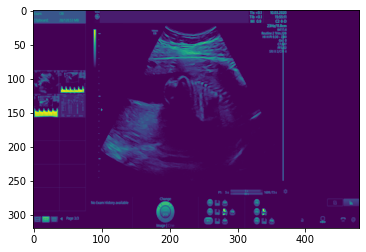

In [36]:
sample['label'],sample['image'].shape
plt.imshow(sample['image'][0])

(<matplotlib.image.AxesImage at 0x7f533c031bb0>, torch.Size([2, 320, 480]))

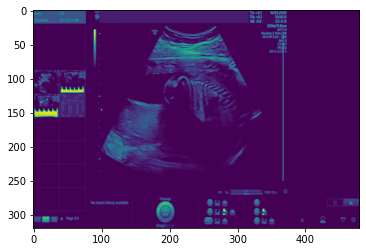

In [37]:
sample['label'],sample['image'].shape
plt.imshow(sample['image'][1]),sample['image'].shape

In [38]:
# plt.imshow(sample['image'][1]),sample['image'].shape

In [39]:
sample['label']

[[('2', '2'),
  ('0.362964', '0.362536'),
  ('0.352779', '0.353757'),
  ('0.157260', '0.158609'),
  ('0.204507', '0.207985')]]

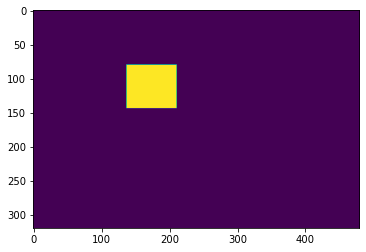

In [40]:
# # plt.imshow(sample['mask'][0])
# print(len(sample['mask'][0]))

# fig, ax = plt.subplots()
# for m in range(len(sample['mask'][0])):
#     ax.imshow(sample['mask'][0][m])
    
# plt.show()    
plt.imshow(sample['mask'][0][0])
# sample['mask'][0].shape

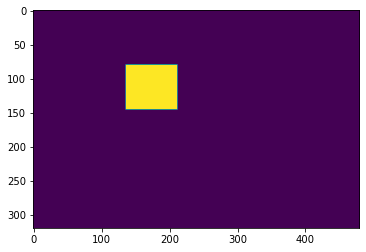

In [41]:
plt.imshow(sample['mask'][0][1])

In [42]:
# print(sample.keys())

# import torch
# from torchvision import transforms
# d=int(512/2)
# # p = transforms.Compose([transforms.Scale((d,d))])

# sample['image'].shape
# sample['image'][0], sample['image'][1]
# import matplotlib.pyplot as plt

# # picA = F.to_pil_image(sample['image'][0])
# picA = F.to_pil_image(sample['image'][0])
# plt.imshow(picA)

In [43]:
# # Test Training
# sample['label']
# sample['mask'][0][0].shape
# sample['mask'][0][1].shape

# sample['label'][0]


# # sample['image'][1]
# imageA = sample["image"][0]
# norm_imageA=imageA.repeat(3, 1, 1)
# # norm_imageA = F.normalize(imageA.repeat(3, 1, 1),
# #                 mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]).unsqueeze(0)

# imageA.shape,norm_imageA.shape

In [44]:
# # examine mask
# # sample['mask'][0][0]
# torch.__version__
# sample['image'][0].shape,sample['image'][0].unsqueeze(0).shape

In [45]:
# # examine label
# # m=torch.swapaxes(sample['label'][0],0,-1)
# # m.shape

# sample['label'][0][0][0],norm_imageA.shape,norm_imageA.__class__

In [46]:
# imageA.shape, norm_imageA.shape

In [47]:
            # Test iteration here

            imageA = sample["image"][0].unsqueeze(0)
            imageB = sample["image"][1].unsqueeze(0)
            # Mask Tensors
            maskA = sample["mask"][0][0].float().unsqueeze(0).to(device)
            maskA[maskA==255]=1
            maskB = sample["mask"][0][1].float().unsqueeze(0).to(device)
            maskB[maskB==255]=1
            # Labels
            labelA = sample["label"][0][0][0]
            labelB = sample["label"][0][0][1]
            

#             picA = p(F.to_pil_image(sample['image'][0]))
#             picB = p(sample['image'][1])
            
            norm_imageA=imageA.repeat(3, 1, 1).unsqueeze(0).float()
            norm_imageB=imageB.repeat(3, 1, 1).unsqueeze(0).float()
#             
#             Normalizing images before sending to the model
#             Forming into batch-shape for processing
#             norm_imageA = F.normalize(imageA.repeat(3, 1, 1),
#                 mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]).unsqueeze(0)
#             norm_imageB = F.normalize(imageB.repeat(3, 1, 1), 
#                 mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]).unsqueeze(0)
            
#             norm_imageA = imageA
#             norm_imageB = imageB
        
            norm_imageA = norm_imageA.to(device)
            norm_imageB = norm_imageB.to(device)

            # Network Run
            pmapA, pmapB, vectorA, vectorB, decision = model(norm_imageA, norm_imageB)

            # Obtaining co-segmentation masks
            # based off of the decision by the decision net
            # During testing, the decision net's value
            # would be thresheld before multiplying
            pred_maskA = pmapA*decision
            pred_maskB = pmapB*decision            

In [48]:
# check image size with model input size
norm_imageA.shape,pred_maskA.shape,maskA.shape

(torch.Size([1, 3, 320, 480]),
 torch.Size([1, 1, 320, 480]),
 torch.Size([1, 320, 480]))

In [49]:
# pred_maskA.shape,maskA.unsqueeze(0).reshape((1,1,384,576)).shape
from PIL import Image
import numpy as np

# PIL_image = Image.fromarray(np.uint8(numpy_image)).convert('RGB')

PIL_image = Image.fromarray(maskA.cpu().numpy().astype('uint8'), 'RGB')
# plt.imshow(PIL_image)
PIL_image
maskA

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:3')

In [50]:
            # Network Run
            pmapA, pmapB, vectorA, vectorB, decision = model(norm_imageA, norm_imageB)

            # Obtaining co-segmentation masks
            # based off of the decision by the decision net
            # During testing, the decision net's value
            # would be thresheld before multiplying
            pred_maskA = pmapA*decision
            pred_maskB = pmapB*decision

            # Loss Calculations/Evaluations
            # Configuring loss weights depending on sample
            # Also deciding if we produce a groundtruth mask
            truth = None
            pairwise = None
            if labelA == labelB: # Positive Sample found
                # Weighting loss evenly
                w1=w2=w3 = 0.33

                truth = 1
                pairwise = 1
            else: # Negative sample
                # Prevent Loss1 from backpropogating
                w1 = 0
                w2=w3 = 0.5

                # Create a null mask from the groundtruths
                maskA = maskA * 0
                maskB = maskB * 0

                truth = 0
                pairwise = -1

            # Loss 1
            # Pixel-wise Binary Cross Entropy Loss
            loss1A = criterion_bce(pred_maskA, maskA.unsqueeze(0))
            loss1B = criterion_bce(pred_maskB, maskB.unsqueeze(0))

            # Loss 2
            # Standard Triplet Loss with Margin
            pairwise = torch.tensor(pairwise).to(device)
            loss2 = criterion_cel(vectorA.unsqueeze(0), vectorB.unsqueeze(0), pairwise)

            # Loss 3
            # Binary Cross Entropy Loss
            truth = torch.tensor(truth).float().unsqueeze(0).to(device)
            loss3 = criterion_bce(decision, truth)

            loss_final = w1*(loss1A + loss1B) + w2*loss2 + w3*loss3

In [51]:
# # loss1A,loss1B,loss2,loss3
# maskA[maskA==255]=1
# maskA.max()

loss1A,loss1B

(tensor(0.3105, device='cuda:3', grad_fn=<BinaryCrossEntropyBackward>),
 tensor(0.3163, device='cuda:3', grad_fn=<BinaryCrossEntropyBackward>))

In [52]:
# # norm_imageA.shape,imageA.shape,pmapA.shape,pred_maskA.shape

# pred_maskA.shape, maskA.unsqueeze(0).shape

# pairwise = torch.tensor(pairwise).to(device)
# loss2 = criterion_cel(vectorA.unsqueeze(0), vectorB.unsqueeze(0), pairwise)

sample['image'][0].shape,sample['image'][1].shape

(torch.Size([320, 480]), torch.Size([320, 480]))

In [53]:
train_size/BATCH_SIZE,train_size,len(dataset)

(60.0, 120, 120)

In [54]:
# ## Check the BatchLoader no error

# loader = tqdm(enumerate(train_loader), desc="Batch Progress: ", total=(train_size/BATCH_SIZE))

# model.train()

# # time_start = time.time()

# for i, sample in loader:
#     print(i,sample.keys(),sample['label'])

In [55]:
import os
try: os.makedirs('./logs')
except: ""

# summary
import datetime
# from torch.utils.tensorboard import SummaryWriter
t1 = datetime.datetime.now().strftime('%Y%m%d%H')
t1

'2021051014'

In [56]:
losses=[]

In [57]:
#Main Train
# writer = SummaryWriter('./logs/{}_{}_{}'.format(now.hour, now.minute, now.second))


for epoch in tqdm(range(EPOCHS), desc="Epoch Progress: "):
    # Losses and Loss Weights
    # Loss_final = W1*L1 + W2*L2 + W3*L3
    total_loss = 0
    loss_final = 0
    loss1A = 0 # Pixel-wise binary cross entropy
    loss1B = 0
    weight1 = 0
    loss2 = 0 # Triplet loss
    weight2 = 0
    loss3 = 0 # Cross Entropy
    weight3 = 0
    
    #Statistics
    predictions_correct = 0
    predictions_total = 0
    background_percent_correct = 0
    
    loader = tqdm(enumerate(train_loader), desc="Batch Progress: ", total=(train_size/BATCH_SIZE))
    
    model.train()
    
    time_start = time.time()
    
    for i, sample in loader:
        try:
            # Image Tensors
            imageA = sample["image"][0].unsqueeze(0)
            imageB = sample["image"][1].unsqueeze(0)
            # Mask Tensors
            maskA = sample["mask"][0][0].float().unsqueeze(0).to(device)
            maskA[maskA==255]=1
            maskB = sample["mask"][0][1].float().unsqueeze(0).to(device)
            maskB[maskB==255]=1
            # Labels
            labelA = sample["label"][0][0][0]
            labelB = sample["label"][0][0][1]

#             picA = p(F.to_pil_image(sample['image'][0]))
#             picB = p(sample['image'][1])
            
#             norm_imageA=imageA.repeat(3, 1, 1)
#             norm_imageB=imageB.repeat(3, 1, 1)            
            
            # Normalizing images before sending to the model
            # Forming into batch-shape for processing
#             norm_imageA = F.normalize(imageA.repeat(3, 1, 1),
#                 mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]).unsqueeze(0)
#             norm_imageB = F.normalize(imageB.repeat(3, 1, 1), 
#                 mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]).unsqueeze(0)
            norm_imageA=imageA.repeat(3, 1, 1).unsqueeze(0).float()
            norm_imageB=imageB.repeat(3, 1, 1).unsqueeze(0).float()


            norm_imageA = norm_imageA.to(device)
            norm_imageB = norm_imageB.to(device)

            # Network Run
            pmapA, pmapB, vectorA, vectorB, decision = model(norm_imageA, norm_imageB)

            # Obtaining co-segmentation masks
            # based off of the decision by the decision net
            # During testing, the decision net's value
            # would be thresheld before multiplying
            pred_maskA = pmapA*decision
            pred_maskB = pmapB*decision

            # Loss Calculations/Evaluations
            # Configuring loss weights depending on sample
            # Also deciding if we produce a groundtruth mask
            truth = None
            pairwise = None
            if labelA == labelB: # Positive Sample found
                # Weighting loss evenly
                w1=w2=w3 = 0.33

                truth = 1
                pairwise = 1
            else: # Negative sample
                # Prevent Loss1 from backpropogating
                w1 = 0
                w2=w3 = 0.5

                # Create a null mask from the groundtruths
                maskA = maskA * 0
                maskB = maskB * 0

                truth = 0
                pairwise = -1

            # Loss 1
            # Pixel-wise Binary Cross Entropy Loss
            loss1A = criterion_bce(pred_maskA, maskA.unsqueeze(0))
            loss1B = criterion_bce(pred_maskB, maskB.unsqueeze(0))

            # Loss 2
            # Standard Triplet Loss with Margin
            pairwise = torch.tensor(pairwise).to(device)
            loss2 = criterion_cel(vectorA.unsqueeze(0), vectorB.unsqueeze(0), pairwise)

            # Loss 3
            # Binary Cross Entropy Loss
            truth = torch.tensor(truth).float().unsqueeze(0).to(device)
            loss3 = criterion_bce(decision, truth)

            loss_final = w1*(loss1A + loss1B) + w2*loss2 + w3*loss3

            loss_final.backward()
            optimizer.step()

            total_loss = total_loss + loss_final.item()
        except Exception as e:
            print(e)
    
    print("Total Loss: " + str(total_loss))
#     print("Total Loss: " + str(total_loss))
    losses.append(total_loss)    
    
    # Validation
    valloader = tqdm(enumerate(test_loader), desc="Batch Progress: ", total=(train_size/BATCH_SIZE))
    
    
    if total_loss < prev_loss and SAVE_WEIGHTS:
        # Check for dir, create if it doesn't exist
        if not os.path.exists(WEIGHTS_PATH):
            os.makedirs(WEIGHTS_PATH)
        
        
        prev_loss = total_loss
        print("Saving Model")
#         torch.save(model.state_dict(), os.path.join(WEIGHTS_PATH, f"BrainSegNet_VGG16.path.loss={str(total_loss)[:6]}.trial={t1}"))
        torch.save(model.state_dict(), os.path.join(WEIGHTS_PATH, f"UlTraSegNet_VGG16.path.trial={t1}"))
        
    # Per-Epoch Update
#     if epoch >=2:
#         writer.add_scalar('training_loss',total_loss/len(dataset), epoch)    
        
        
    time_total = round(time.time() - time_start, 2)
    print('Total Time: ',time_total)
    print('Epoch #:',epoch)

open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
Saving Model
open  
/workspace/ultrasound/test_all_amt50/60_332.txtopen  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
Total Time:  14.55
Epoch #: 0


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  
/workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txtSaving Model
open  /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/61_403.txt
Total Time:  15.52
Epoch #: 1


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
Saving Model
open  
/workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txtopen  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
Total Time:  15.85
Epoch #: 2


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt

open  /workspace/ultrasound/test_all_amt50/49_366.txtTotal Time:  16.06
Epoch #: 3


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  
/workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txtSaving Model
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
Total Time:  15.97
Epoch #: 4


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/61_403.txt
Total Time:  16.35
Epoch #: 5


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txtSaving Model

open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/46_620.txt
open  /workspace/ultrasound/test_all_amt50/46_620.txt
Total Time:  16.28
Epoch #: 6


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
Total Time:  16.02
Epoch #: 7


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open 
 /workspace/ultrasound/test_all_amt50/77_455.txtopen  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txt
open 
 /workspace/ultrasound/test_all_amt50/45_358.txtSaving Model
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
Total Time:  16.29
Epoch #: 8


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  Saving Model
/workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
Total Time:  16.08
Epoch #: 9


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open Saving Model
 /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
Total Time:  16.29
Epoch #: 10


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/46_620.txt
open  /workspace/ultrasound/test_all_amt50/46_620.txt
open Saving Model
 /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open   /workspace/ultrasound/test_all_amt50/43_344.txt
open /workspace/ultrasound/test_all_amt50/43_344.txt
Total Time:  15.97
Epoch #: 11


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/60_331.txt
open  /workspace/ultrasound/test_all_amt50/60_331.txt
open  /workspace/ultrasound/test_all_amt50/46_620.txt
open  /workspace/ultrasound/test_all_amt50/46_620.txt
Total Time:  16.57
Epoch #: 12


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/68_354.txtopen 
 /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
Total Time:  16.39
Epoch #: 13


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/46_620.txt
open  Saving Model
/workspace/ultrasound/test_all_amt50/46_620.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
Total Time:  16.27
Epoch #: 14


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
Total Time:  16.01
Epoch #: 15


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

Total Time:  15.04
Epoch #: 16
open 
 /workspace/ultrasound/test_all_amt50/60_332.txtopen  /workspace/ultrasound/test_all_amt50/60_332.txt


open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/60_331.txt
open  /workspace/ultrasound/test_all_amt50/60_331.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/

Total Time:  15.45
Epoch #: 17
open  
/workspace/ultrasound/test_all_amt50/53_399.txt
open  

/workspace/ultrasound/test_all_amt50/53_399.txtopen  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_al

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/54_433.txt
Total Time:  16.72
Epoch #: 18


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

Total Time:  15.11
Epoch #: 19
open 
 /workspace/ultrasound/test_all_amt50/45_358.txt


open  /workspace/ultrasound/test_all_amt50/45_358.txtopen  /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/60_331.txt
open  /workspace/ultrasound/test_all_amt50/60_331.txt
Total Time:  16.5
Epoch #: 20


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

Total Time:  15.21
Epoch #: 21
open 
 /workspace/ultrasound/test_all_amt50/52_422.txt


open  /workspace/ultrasound/test_all_amt50/52_422.txtopen  /workspace/ultrasound/test_all_amt50/40_403.txt
open open   /workspace/ultrasound/test_all_amt50/61_403.txt/workspace/ultrasound/test_all_amt50/40_403.txt

open  /workspace/ultrasound/test_all_amt50/61_403.txt
open open   /workspace/ultrasound/test_all_amt50/77_455.txt/workspace/ultrasound/test_all_amt50/40_404.txt

open open   /workspace/ultrasound/test_all_amt50/40_404.txt/workspace/ultrasound/test_all_amt50/77_455.txt

open open   /workspace/ultrasound/test_all_amt50/40_405.txt/workspace/ultrasound/test_all_amt50/45_358.txt

open open   /workspace/ultrasound/test_all_amt50/45_358.txt/workspace/ultrasound/test_all_amt50/40_405.txt

open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.44
Epoch #: 22
open  /workspace/ultrasound/test_all_amt50/42_306.txt


open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.5
Epoch #: 23
open 
 /workspace/ultrasound/test_all_amt50/43_344.txt


open  /workspace/ultrasound/test_all_amt50/43_344.txtopen  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/46_620.txt
open  /workspace/ultrasound/test_all_amt50/46_620.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.54
Epoch #: 24
open 
 /workspace/ultrasound/test_all_amt50/45_358.txt


open  /workspace/ultrasound/test_all_amt50/45_358.txtopen  open /workspace/ultrasound/test_all_amt50/40_403.txt 
/workspace/ultrasound/test_all_amt50/40_403.txtopen 
 /workspace/ultrasound/test_all_amt50/40_403.txtopen 
 /workspace/ultrasound/test_all_amt50/40_403.txt
open  open /workspace/ultrasound/test_all_amt50/61_403.txt /workspace/ultrasound/test_all_amt50/40_404.txt
open  
/workspace/ultrasound/test_all_amt50/40_404.txtopen 
 /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txtopen 
 /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.53
Epoch #: 25
open  /workspace/ultrasound/test_all_amt50/61_403.txt


open  /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.61
Epoch #: 26
open 
 /workspace/ultrasound/test_all_amt50/60_332.txt
open  

/workspace/ultrasound/test_all_amt50/60_332.txtopen  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_al

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.61
Epoch #: 27
open 
 /workspace/ultrasound/test_all_amt50/78_658.txt


open  /workspace/ultrasound/test_all_amt50/78_658.txtopen  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txtopen 
 /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/60_331.txt
open  /workspace/ultrasound/test_all_amt50/60_331.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.59
Epoch #: 28
open   /workspace/ultrasound/test_all_amt50/78_658.txt


open /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open open   /workspace/ultrasound/test_all_amt50/73_509.txt/workspace/ultrasound/test_all_amt50/40_404.txt

open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  open /workspace/ultrasound/test_all_amt50/60_332.txt
 open /workspace/ultrasound/test_all_amt50/40_405.txt 
/workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.59
Epoch #: 29
open 
 /workspace/ultrasound/test_all_amt50/51_451.txt
open  

/workspace/ultrasound/test_all_amt50/51_451.txtopen open   /workspace/ultrasound/test_all_amt50/40_403.txt/workspace/ultrasound/test_all_amt50/40_403.txt

open open   /workspace/ultrasound/test_all_amt50/40_403.txt/workspace/ultrasound/test_all_amt50/40_403.txt

open open  /workspace/ultrasound/test_all_amt50/40_404.txt /workspace/ultrasound/test_all_amt50/59_451.txt

open  open /workspace/ultrasound/test_all_amt50/40_404.txt
 /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_al

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.61
Epoch #: 30
open 
 /workspace/ultrasound/test_all_amt50/52_423.txt


open  /workspace/ultrasound/test_all_amt50/52_423.txtopen  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.67
Epoch #: 31
open 
 /workspace/ultrasound/test_all_amt50/51_451.txt
open  

/workspace/ultrasound/test_all_amt50/51_451.txtopen  /workspace/ultrasound/test_all_amt50/59_451.txt
open open  /workspace/ultrasound/test_all_amt50/59_451.txt
 /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_al

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.62
Epoch #: 32
open 
 /workspace/ultrasound/test_all_amt50/68_354.txt


open  /workspace/ultrasound/test_all_amt50/68_354.txtopen  open /workspace/ultrasound/test_all_amt50/52_423.txt
open   /workspace/ultrasound/test_all_amt50/52_423.txt
/workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.69
Epoch #: 33
open  /workspace/ultrasound/test_all_amt50/46_620.txt


open  /workspace/ultrasound/test_all_amt50/46_620.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasou

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.65
Epoch #: 34
open 
 /workspace/ultrasound/test_all_amt50/61_403.txt
open  

/workspace/ultrasound/test_all_amt50/61_403.txtopen  /workspace/ultrasound/test_all_amt50/49_366.txt
open open   /workspace/ultrasound/test_all_amt50/49_366.txt/workspace/ultrasound/test_all_amt50/40_403.txt

open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  open /workspace/ultrasound/test_all_amt50/40_404.txt 
/workspace/ultrasound/test_all_amt50/78_658.txtopen 
 /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txtopen 
 open  /workspace/ultrasound/test_all_amt50/40_405.txt/workspace/ultrasound/test_all_amt50/43_344.txt

open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_al

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.73
Epoch #: 35
open 
 /workspace/ultrasound/test_all_amt50/40_403.txt
open  

/workspace/ultrasound/test_all_amt50/40_403.txtopen  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/60_331.txt
open  /workspace/ultrasound/test_all_amt50/60_331.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_al

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.65
Epoch #: 36
open  /workspace/ultrasound/test_all_amt50/45_358.txt


open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.69
Epoch #: 37
open  /workspace/ultrasound/test_all_amt50/52_422.txt


open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.73
Epoch #: 38
open 
 /workspace/ultrasound/test_all_amt50/53_399.txt


open  /workspace/ultrasound/test_all_amt50/53_399.txtopen  /workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.81
Epoch #: 39
open   /workspace/ultrasound/test_all_amt50/42_306.txt
open /workspace/ultrasound/test_all_amt50/42_306.txt


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open open   /workspace/ultrasound/test_all_amt50/40_403.txt/workspace/ultrasound/test_all_amt50/46_620.txt

open  /workspace/ultrasound/test_all_amt50/46_620.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txt
open  open /workspace/ultrasound/test_all_amt50/40_404.txt 
/workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/

Total Time:  15.74
Epoch #: 40
open  /workspace/ultrasound/test_all_amt50/53_399.txt


open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open open   /workspace/ultrasound/test_all_amt50/40_404.txt/workspace/ultrasound/test_all_amt50/49_366.txt

open open  /workspace/ultrasound/test_all_amt50/40_404.txt 
/workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasou

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.71
Epoch #: 41
open  /workspace/ultrasound/test_all_amt50/61_403.txt


open  /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txtopen 
open  /workspace/ultrasound/test_all_amt50/45_358.txt /workspace/ultrasound/test_all_amt50/40_403.txt

open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txtopen 
 /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.67
Epoch #: 42
open 
 /workspace/ultrasound/test_all_amt50/73_509.txt
open  

/workspace/ultrasound/test_all_amt50/73_509.txtopen  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txtopen 
 open /workspace/ultrasound/test_all_amt50/68_354.txt /workspace/ultrasound/test_all_amt50/40_404.txt

open  /workspace/ultrasound/test_all_amt50/68_354.txt
open open   /workspace/ultrasound/test_all_amt50/40_405.txt/workspace/ultrasound/test_all_amt50/53_401.txt

open open   /workspace/ultrasound/test_all_amt50/53_401.txt/workspace/ultrasound/test_all_amt50/40_405.txt

open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_al

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.74
Epoch #: 43
open 
 /workspace/ultrasound/test_all_amt50/51_451.txt


open  /workspace/ultrasound/test_all_amt50/51_451.txtopen  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.79
Epoch #: 44
open   /workspace/ultrasound/test_all_amt50/40_403.txt
open /workspace/ultrasound/test_all_amt50/40_403.txt


open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/

Total Time:  15.76
Epoch #: 45
open 

 /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  open /workspace/ultrasound/test_all_amt50/40_403.txt
 open /workspace/ultrasound/test_all_amt50/40_403.txt /workspace/ultrasound/test_all_amt50/40_403.txt

open  /workspace/ultrasound/test_all_amt50/40_403.txt
open open   /workspace/ultrasound/test_all_amt50/40_404.txt
open /workspace/ultrasound/test_all_amt50/61_403.txt 
/workspace/ultrasound/test_all_amt50/40_404.txtopen  
/workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txtopen  
open /workspace/ultrasound/test_all_amt50/40_405.txt /workspace/ultrasound/test_all_amt50/53_399.txt

open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_

open  /workspace/ultrasound/test_all_amt50/63_408.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.63
Epoch #: 46
open 
 /workspace/ultrasound/test_all_amt50/46_620.txt


open  /workspace/ultrasound/test_all_amt50/46_620.txtopen  /workspace/ultrasound/test_all_amt50/60_331.txt
open  /workspace/ultrasound/test_all_amt50/60_331.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open open  /workspace/ultrasound/test_all_amt50/46_622.txt 
/workspace/ultrasound/test_all_amt50/40_405.txtopen 
 /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.67
Epoch #: 47
open 
 /workspace/ultrasound/test_all_amt50/52_423.txt


open  /workspace/ultrasound/test_all_amt50/52_423.txtopen  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/46_620.txt
open open   /workspace/ultrasound/test_all_amt50/46_620.txt
/workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.69
Epoch #: 48
open   /workspace/ultrasound/test_all_amt50/71_1002.txt


open /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.76
Epoch #: 49
open 
 /workspace/ultrasound/test_all_amt50/61_403.txt


open  /workspace/ultrasound/test_all_amt50/61_403.txtopen open   /workspace/ultrasound/test_all_amt50/42_306.txt/workspace/ultrasound/test_all_amt50/40_403.txt

open open  /workspace/ultrasound/test_all_amt50/42_306.txt 
/workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txtopen 
 /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.69
Epoch #: 50
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open 

 /workspace/ultrasound/test_all_amt50/68_354.txt
open open   /workspace/ultrasound/test_all_amt50/40_403.txt/workspace/ultrasound/test_all_amt50/60_332.txt

open open   /workspace/ultrasound/test_all_amt50/40_403.txt/workspace/ultrasound/test_all_amt50/60_332.txt

open  /workspace/ultrasound/test_all_amt50/46_620.txt
open open   /workspace/ultrasound/test_all_amt50/40_404.txt/workspace/ultrasound/test_all_amt50/46_620.txt

open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  open /workspace/ultrasound/test_all_amt50/40_405.txt /workspace/ultrasound/test_all_amt50/40_403.txt

open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.66
Epoch #: 51
open 
 /workspace/ultrasound/test_all_amt50/60_331.txt


open  /workspace/ultrasound/test_all_amt50/60_331.txtopen  /workspace/ultrasound/test_all_amt50/43_344.txt
open open  /workspace/ultrasound/test_all_amt50/43_344.txt 
/workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.65
Epoch #: 52
open 
 /workspace/ultrasound/test_all_amt50/45_358.txt


open  /workspace/ultrasound/test_all_amt50/45_358.txtopen  /workspace/ultrasound/test_all_amt50/40_403.txt
open open   /workspace/ultrasound/test_all_amt50/40_403.txt
/workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
/workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.73
Epoch #: 53
open /workspace/ultrasound/test_all_amt50/40_403.txt /workspace/ultrasound/test_all_amt50/40_403.txt


open  
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultr

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/

Total Time:  15.69
Epoch #: 54
open 
 /workspace/ultrasound/test_all_amt50/40_403.txt


open  /workspace/ultrasound/test_all_amt50/40_403.txtopen  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.7
Epoch #: 55
open  /workspace/ultrasound/test_all_amt50/53_399.txt


open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.76
Epoch #: 56
open  /workspace/ultrasound/test_all_amt50/77_455.txt


open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.69
Epoch #: 57
open  /workspace/ultrasound/test_all_amt50/60_332.txt


open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open open   /workspace/ultrasound/test_all_amt50/40_403.txt/workspace/ultrasound/test_all_amt50/43_344.txt

open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  17.02
Epoch #: 58


open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  open /workspace/ultrasound/test_all_amt50/53_399.txt
 /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  open  /workspace/ultrasound/test_all_amt50/76_492.txt/workspace/ultrasound/test_all_amt50/40_404.txt

open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  open /workspace/ultrasound/test_all_amt50/45_358.txt 
/workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/63_408.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.75
Epoch #: 59
open 

 /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open open  /workspace/ultrasound/test_all_amt50/52_422.txt 
/workspace/ultrasound/test_all_amt50/40_403.txtopen 
 open  /workspace/ultrasound/test_all_amt50/52_422.txt/workspace/ultrasound/test_all_amt50/40_403.txt

open  /workspace/ultrasound/test_all_amt50/78_658.txtopen  
/workspace/ultrasound/test_all_amt50/40_404.txt
open open   /workspace/ultrasound/test_all_amt50/40_404.txt/workspace/ultrasound/test_all_amt50/78_658.txt

open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_

open  /workspace/ultrasound/test_all_amt50/63_408.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.8
Epoch #: 60
open  

/workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open open   /workspace/ultrasound/test_all_amt50/40_405.txt/workspace/ultrasound/test_all_amt50/53_399.txt

open  open /workspace/ultrasound/test_all_amt50/53_399.txt 
/workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test

open  /workspace/ultrasound/test_all_amt50/63_408.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.87
Epoch #: 61
open  /workspace/ultrasound/test_all_amt50/53_401.txt


open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.74
Epoch #: 62
open  
/workspace/ultrasound/test_all_amt50/53_399.txt


open  /workspace/ultrasound/test_all_amt50/53_399.txtopen  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open Saving Model
 /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txt
Total Time:  17.21
Epoch #: 63


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open 
 /workspace/ultrasound/test_all_amt50/42_307.txtopen  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/60_331.txt
open  /workspace/ultrasound/test_all_amt50/60_331.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
Total Time:  16.66
Epoch #: 64


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

Total Time:  15.35
Epoch #: 65
open  /workspace/ultrasound/test_all_amt50/40_403.txt


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.7
Epoch #: 66
open 
 /workspace/ultrasound/test_all_amt50/53_401.txt


open  /workspace/ultrasound/test_all_amt50/53_401.txtopen  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open open   /workspace/ultrasound/test_all_amt50/52_423.txt
/workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

open 
 /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txtopen  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
Total Time:  17.05
Epoch #: 67


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

Total Time:  15.42
Epoch #: 68
open  /workspace/ultrasound/test_all_amt50/76_492.txt


open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open open   /workspace/ultrasound/test_all_amt50/40_405.txt/workspace/ultrasound/test_all_amt50/60_332.txt

open open   /workspace/ultrasound/test_all_amt50/40_405.txt/workspace/ultrasound/test_all_amt50/60_332.txt

open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.69
Epoch #: 69
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open 

 /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txtopen 
 /workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/46_620.txt
open  /workspace/ultrasound/test_all_amt50/46_620.txt
open  /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/61_403.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  
/workspace/ultrasound/test_all_amt50/68_354.txtopen  /workspace/ultrasound/test_all_amt50/45_358.txt
open 
 /workspace/ultrasound/test_all_amt50/45_358.txtTotal Time:  17.2
Epoch #: 70


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

Total Time:  15.39
Epoch #: 71
open 
 /workspace/ultrasound/test_all_amt50/53_401.txt


open  /workspace/ultrasound/test_all_amt50/53_401.txtopen  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
Total Time:  16.83
Epoch #: 72


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

Total Time:  15.48
Epoch #: 73
open 

 /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_

open  /workspace/ultrasound/test_all_amt50/63_408.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.85
Epoch #: 74
open  /workspace/ultrasound/test_all_amt50/68_354.txt


open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txtopen 
open   /workspace/ultrasound/test_all_amt50/40_403.txt/workspace/ultrasound/test_all_amt50/43_344.txt

open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasou

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txt
open Saving Model
 /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
Total Time:  17.52
Epoch #: 75


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
Total Time:  17.15
Epoch #: 76


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

Total Time:  15.35
Epoch #: 77
open /workspace/ultrasound/test_all_amt50/51_451.txt /workspace/ultrasound/test_all_amt50/51_451.txt


open  
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultr

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/

Total Time:  15.59
Epoch #: 78
open  /workspace/ultrasound/test_all_amt50/76_492.txt


open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txtopen 
 /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  open /workspace/ultrasound/test_all_amt50/43_344.txt /workspace/ultrasound/test_all_amt50/40_404.txt

open  open  /workspace/ultrasound/test_all_amt50/43_344.txt/workspace/ultrasound/test_all_amt50/40_404.txt

open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.81
Epoch #: 79
open 
 /workspace/ultrasound/test_all_amt50/46_622.txt


open  /workspace/ultrasound/test_all_amt50/46_622.txtopen  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
Total Time:  17.16
Epoch #: 80


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

Total Time:  15.43
Epoch #: 81
open 
 /workspace/ultrasound/test_all_amt50/51_451.txt


open  /workspace/ultrasound/test_all_amt50/51_451.txtopen  /workspace/ultrasound/test_all_amt50/46_620.txt
open  open /workspace/ultrasound/test_all_amt50/46_620.txt
 /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.68
Epoch #: 82
open 
 /workspace/ultrasound/test_all_amt50/71_1002.txt


open  /workspace/ultrasound/test_all_amt50/71_1002.txtopen  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.81
Epoch #: 83
open 

 /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txtopen 
 /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  open /workspace/ultrasound/test_all_amt50/53_401.txt 
/workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_

open  /workspace/ultrasound/test_all_amt50/63_408.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.77
Epoch #: 84
open  /workspace/ultrasound/test_all_amt50/76_492.txt


open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/61_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
Total Time:  17.22
Epoch #: 85


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txt
Total Time:  16.8
Epoch #: 86


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

Total Time:  15.36
Epoch #: 87
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open 

 /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/52_422.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.65
Epoch #: 88
open 
 /workspace/ultrasound/test_all_amt50/68_354.txt


open  /workspace/ultrasound/test_all_amt50/68_354.txtopen  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.73
Epoch #: 89
open  /workspace/ultrasound/test_all_amt50/53_401.txt


open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/51_451.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txtopen 
 /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  open /workspace/ultrasound/test_all_amt50/78_658.txt
 /workspace/ultrasound/test_all_amt50/40_404.txtopen 
 open  /workspace/ultrasound/test_all_amt50/78_658.txt/workspace/ultrasound/test_all_amt50/40_404.txt

open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/77_455.txt

open  /workspace/ultrasound/test_all_amt50/77_455.txtopen  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open Saving Model
 /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/60_331.txt
open  /workspace/ultrasound/test_all_amt50/60_331.txt
Total Time:  16.87
Epoch #: 90


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
Total Time:  16.96
Epoch #: 91


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

Total Time:  15.33
Epoch #: 92
open 
 /workspace/ultrasound/test_all_amt50/40_403.txt


open  /workspace/ultrasound/test_all_amt50/40_403.txtopen  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.63
Epoch #: 93
open 

 /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open open  /workspace/ultrasound/test_all_amt50/53_399.txt
 open /workspace/ultrasound/test_all_amt50/40_403.txt 
/workspace/ultrasound/test_all_amt50/53_399.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txtopen  /workspace/ultrasound/test_all_amt50/40_404.txt

open open   /workspace/ultrasound/test_all_amt50/40_404.txt
/workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txtopen 
 /workspace/ultrasound/test_all_amt50/78_658.txtopen 
 open /workspace/ultrasound/test_all_amt50/40_405.txt 
/workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_

open  /workspace/ultrasound/test_all_amt50/63_408.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.69
Epoch #: 94
open 
 /workspace/ultrasound/test_all_amt50/42_306.txt


open  /workspace/ultrasound/test_all_amt50/42_306.txtopen  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/73_509.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/60_332.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
Saving Model
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/76_492.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/49_366.txt
Total Time:  17.98
Epoch #: 95


open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_305.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/test_all_amt50/42_307.txt
open  /workspace/ultrasound/

open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_427.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_428.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/67_429.txt
open  /workspace/ultrasound/test_all_amt50/68_354.txt
open  /workspace/ultrasound/

Total Time:  15.25
Epoch #: 96
open  /workspace/ultrasound/test_all_amt50/42_306.txt


open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  open /workspace/ultrasound/test_all_amt50/40_403.txt 
/workspace/ultrasound/test_all_amt50/43_344.txtopen 
 open /workspace/ultrasound/test_all_amt50/40_403.txt 
/workspace/ultrasound/test_all_amt50/43_344.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/71_1002.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasoun

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.66
Epoch #: 97
open 
 /workspace/ultrasound/test_all_amt50/43_344.txt
open  

/workspace/ultrasound/test_all_amt50/43_344.txtopen  /workspace/ultrasound/test_all_amt50/78_658.txtopen 
open  /workspace/ultrasound/test_all_amt50/40_403.txt 
/workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/46_622.txt
open open  /workspace/ultrasound/test_all_amt50/40_404.txt
open  /workspace/ultrasound/test_all_amt50/40_404.txt 
/workspace/ultrasound/test_all_amt50/46_622.txt
open  /workspace/ultrasound/test_all_amt50/40_405.txt
open open  /workspace/ultrasound/test_all_amt50/49_366.txt 
/workspace/ultrasound/test_all_amt50/40_405.txtopen 
 /workspace/ultrasound/test_all_amt50/49_366.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/test_al

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

Total Time:  15.79
Epoch #: 98
open 
 /workspace/ultrasound/test_all_amt50/51_451.txt


open  /workspace/ultrasound/test_all_amt50/51_451.txtopen open  /workspace/ultrasound/test_all_amt50/73_509.txt 
/workspace/ultrasound/test_all_amt50/40_403.txt
open open   /workspace/ultrasound/test_all_amt50/73_509.txt/workspace/ultrasound/test_all_amt50/40_403.txt

open open   /workspace/ultrasound/test_all_amt50/40_404.txt/workspace/ultrasound/test_all_amt50/42_306.txt
open 
 /workspace/ultrasound/test_all_amt50/40_404.txtopen 
 /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/54_433.txt
open open  /workspace/ultrasound/test_all_amt50/40_405.txt /workspace/ultrasound/test_all_amt50/54_433.txt

open  /workspace/ultrasound/test_all_amt50/40_405.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_387.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_388.txt
open  /workspace/ultrasound/test_all_amt50/41_389.txt
open  /workspace/ultrasound/t

open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_359.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_360.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/64_361.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_295.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/65_297.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_351.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_352.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/test_all_amt50/66_353.txt
open  /workspace/ultrasound/

open 
 /workspace/ultrasound/test_all_amt50/45_358.txt
open  /workspace/ultrasound/test_all_amt50/45_358.txtSaving Model
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/40_403.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/53_401.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
Total Time:  17.47
Epoch #: 99



In [116]:
# # def validate
#     for i, sample in loader:
#         try:
#             # Image Tensors
#             imageA = sample["image"][0].unsqueeze(0)
#             imageB = sample["image"][1].unsqueeze(0)
#             # Mask Tensors
#             maskA = sample["mask"][0][0].float().unsqueeze(0).to(device)
#             maskA[maskA==255]=1
#             maskB = sample["mask"][0][1].float().unsqueeze(0).to(device)
#             maskB[maskB==255]=1
#             # Labels
#             labelA = sample["label"][0][0][0]
#             labelB = sample["label"][0][0][1]

#             norm_imageA=imageA.repeat(3, 1, 1).unsqueeze(0).float()
#             norm_imageB=imageB.repeat(3, 1, 1).unsqueeze(0).float()


#             norm_imageA = norm_imageA.to(device)
#             norm_imageB = norm_imageB.to(device)

#             # Network Run
#             pmapA, pmapB, vectorA, vectorB, decision = model(norm_imageA, norm_imageB)
#         except:
#             ""
            




In [58]:
# Check model presence
output=f"UlTraSegNet_VGG16.path.trial={t1}"
print('saved',output)
!ls {WEIGHTS_PATH}/{output}

# Loa from file
# if (0):
    

saved UlTraSegNet_VGG16.path.trial=2021051014
'./weights/UlTraSegNet_VGG16.path.trial=2021051014'


In [59]:
import pickle

with open(f"losses.{t1}.pkl",'wb') as f:
     pickle.dump(np.array(losses), f)

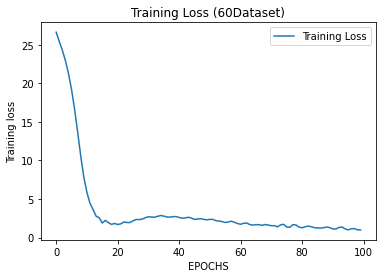

In [61]:
EPOCHS
# acc = history.history['accuracy']

# loss=history.history['loss']

epochs_range = range(EPOCHS)
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training Accuracy')

# plt.subplot(1, 1, 1)
ax.plot(epochs_range, losses, label='Training Loss')
ax.legend(loc='upper right')
ax.set_title('Training Loss (60Dataset)')
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Training loss')
fig.show()
fig.savefig(f"fig1_training.{t1}.t30.png", bbox_inches='tight')

## Testing

In [118]:
import numpy as np
def _dice_coefficient(predicted, target):
    """Calculates the Sørensen–Dice Coefficient for a
    single sample.
    Parameters:
        predicted(numpy.ndarray): Predicted single output of the network.
                                Shape - (Channel,Height,Width)
        target(numpy.ndarray): Actual required single output for the network
                                Shape - (Channel,Height,Width)

    Returns:
        coefficient(float): Dice coefficient for the input sample.
                                    1 represents high similarity and
                                    0 represents low similarity.
    """
    smooth = 1
    product = np.multiply(predicted, target)
    intersection = np.sum(product)
    coefficient = (2*intersection + smooth) / \
        (np.sum(predicted) + np.sum(target) + smooth)
    return coefficient

import cv2

def get_dice_score(pmapB,maskB):
    pmapB_np=pmapB.cpu().detach().numpy().squeeze(0)
    maskB_np=maskB.cpu().detach().numpy()

    ret, bw_img = cv2.threshold(pmapB_np,0.06,1,cv2.THRESH_BINARY)

    dice_score=_dice_coefficient(maskB_np[0,:],bw_img[0,:])
    print('Dice',dice_score)
    return dice_score

# pmapB_np
# bw_img.shape,maskB_np.shape

In [119]:
# #
# output=''


# def test_unseen_pairs():
#     ""
    
# len(test_loader)

In [120]:
sample = next(iter(test_loader))
print(sample['label'])
sample = next(iter(test_loader))
print(sample['label'])

open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/78_658.txt
open  /workspace/ultrasound/test_all_amt50/44_478.txt
open  /workspace/ultrasound/test_all_amt50/44_478.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/65_296.txt
open  /workspace/ultrasound/test_all_amt50/44_476.txt
open  /workspace/ultrasound/test_all_amt50/44_476.txt
[[('2', '2'), ('0.337884', '0.495605'), ('0.403928', '0.271540'), ('0.140114', '0.154886'), ('0.197627', '0.096755')]]
open  /workspace/ultrasound/test_all_amt50/46_620.txt
open  /workspace/ultrasound/test_all_amt50/46_620.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/42_306.txt
open  /workspace/ultrasound/test_all_amt50/55_480.txt
open  /workspace/ultrasound/test_all_amt50/55_480.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
open  /workspace/ultrasound/test_all_amt50/59_451.txt
[[('2', '2'), ('0

In [148]:


# # Test Instance
sample = next(iter(test_loader))

sample

open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/77_455.txt
open  /workspace/ultrasound/test_all_amt50/43_345.txt
open  /workspace/ultrasound/test_all_amt50/43_345.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/52_423.txt
open  /workspace/ultrasound/test_all_amt50/44_478.txt
open  /workspace/ultrasound/test_all_amt50/44_478.txt


{'image': tensor([[[67, 67, 67,  ...,  0,  0,  0],
          [67, 67, 67,  ...,  0,  0,  0],
          [68, 67, 69,  ...,  0,  0,  0],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]],
 
         [[67, 67, 67,  ...,  0,  0,  0],
          [67, 67, 67,  ...,  0,  0,  0],
          [69, 68, 68,  ...,  0,  0,  0],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]]], dtype=torch.uint8),
 'label': [[('2', '2'),
   ('0.354691', '0.527689'),
   ('0.538503', '0.212761'),
   ('0.314840', '0.118513'),
   ('0.374619', '0.175618')]],
 'mask': [tensor([[[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]],
  
          [[0, 0, 0,  ..., 0, 0, 0],
   

In [149]:

# Image Tensors
imageA = sample["image"][0].unsqueeze(0)
imageB = sample["image"][1].unsqueeze(0)
# Mask Tensors
maskA = sample["mask"][0][0].float().unsqueeze(0).to(device)
maskA[maskA==255]=1
maskB = sample["mask"][0][1].float().unsqueeze(0).to(device)
maskB[maskB==255]=1
# Labels
labelA = sample["label"][0][0][0]
labelB = sample["label"][0][0][1]

#             picA = p(F.to_pil_image(sample['image'][0]))
#             picB = p(sample['image'][1])

#             norm_imageA=imageA.repeat(3, 1, 1)
#             norm_imageB=imageB.repeat(3, 1, 1)            

# Normalizing images before sending to the model
# Forming into batch-shape for processing
#             norm_imageA = F.normalize(imageA.repeat(3, 1, 1),
#                 mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]).unsqueeze(0)
#             norm_imageB = F.normalize(imageB.repeat(3, 1, 1), 
#                 mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]).unsqueeze(0)
norm_imageA=imageA.repeat(3, 1, 1).unsqueeze(0).float()
norm_imageB=imageB.repeat(3, 1, 1).unsqueeze(0).float()


norm_imageA = norm_imageA.to(device)
norm_imageB = norm_imageB.to(device)

In [150]:
model.eval()
pmapA, pmapB, vectorA, vectorB, decision = model(norm_imageA, norm_imageB)


# labelA.item(),labelB.item()

get_dice_score(pmapA,maskA),get_dice_score(pmapB,maskB)

Dice 0.9318169132012281
Dice 0.8070762189755325


(0.9318169132012281, 0.8070762189755325)

In [151]:
# loader = tqdm(enumerate(newloader), desc="Batch Progress: ", total=(len(newloader)/BATCH_SIZE))

# len(newloader)

In [152]:
### Get newgative

filep='/workspace/ultrasound/test_negative/*.jpg'
# filep='//ethan/newshare/classwork/data2/train/sample_mix/*.jpg'
lfiles=glob.glob(filep)

print('est lengh',len(lfiles))

new_test_neg=FetalUltrasoundDataset(filep)


newloader_neg = DataLoader(
    new_test_neg,
    batch_size=1,
    num_workers=NUM_WORKERS,
    shuffle=SHUFFLE,
    drop_last=True
)

# # Ground Instance
sample = next(iter(newloader_neg))

# Image Tensors
imageA = sample["image"][0].unsqueeze(0)
norm_imageA_neg=imageA.repeat(3, 1, 1).unsqueeze(0).float()
norm_imageA_neg=norm_imageA_neg.to(device)

est lengh 13
open  /workspace/ultrasound/test_negative/352.txt
no label
load image only
open  /workspace/ultrasound/test_negative/362.txt
no label
load image only


In [157]:
### Build New Loader landmarks ###

### Get newgative

filep='/workspace/ultrasound/landmark_img/*.jpg'
# filep='//ethan/newshare/classwork/data2/train/sample_mix/*.jpg'
lfiles=glob.glob(filep)

print('est lengh',len(lfiles))

new_test_land=FetalUltrasoundDataset(filep)

BATCH_SIZE=1
newloader_land = DataLoader(
    new_test_land,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=SHUFFLE,
    drop_last=True
)

# sample = next(iter(newloader_neg))

# # # Ground Instance
# sample = next(iter(newloader_neg))

# # Image Tensors
# imageA = sample["image"][0].unsqueeze(0)
# norm_imageA_neg=imageA.repeat(3, 1, 1).unsqueeze(0).float()
# norm_imageA_neg=norm_imageA_neg.to(device)

loader_test = tqdm(enumerate(newloader_land), desc="Batch Progress: ", total=(len(newloader_land)/BATCH_SIZE))

len(newloader_land)

est lengh 80


80

open  /workspace/ultrasound/landmark_img/57_485.txt
open  /workspace/ultrasound/landmark_img/57_485.txt
open  /workspace/ultrasound/landmark_img/5_469.txt
open  /workspace/ultrasound/landmark_img/5_469.txt
open  /workspace/ultrasound/landmark_img/48_598.txt
open  /workspace/ultrasound/landmark_img/48_598.txt
open  /workspace/ultrasound/landmark_img/13_370.txt
open  /workspace/ultrasound/landmark_img/13_370.txt
open  /workspace/ultrasound/landmark_img/78_867.txt
open  /workspace/ultrasound/landmark_img/78_867.txt
open  /workspace/ultrasound/landmark_img/38_509.txt
open  /workspace/ultrasound/landmark_img/38_509.txt
open  /workspace/ultrasound/landmark_img/24_849.txt
open  /workspace/ultrasound/landmark_img/24_849.txt
open  /workspace/ultrasound/landmark_img/25_830.txt
open  /workspace/ultrasound/landmark_img/25_830.txt
open  /workspace/ultrasound/landmark_img/21_787.txt
open  /workspace/ultrasound/landmark_img/21_787.txt
open  /workspace/ultrasound/landmark_img/17_760.txt
open  /workspa

In [158]:
# !ls ../../
# len(loader_test)

In [159]:
l_score=[]
cls=0
for i, sample in loader_test:
    print('i',i)
    ## TestBench
#     sample = next(iter(newloader))
    # Image Tensors
#     imageA = sample["image"][0].unsqueeze(0)
#     imageB = sample["image"][1].unsqueeze(0)
#     # Mask Tensors
#     maskA = sample["mask"][0][0].float().unsqueeze(0).to(device)
#     maskA[maskA==255]=1
#     maskB = sample["mask"][0][1].float().unsqueeze(0).to(device)
#     maskB[maskB==255]=1
#     # Labels
#     labelA = sample["label"][0][0][0]
#     labelB = sample["label"][0][0][1]

    
    
#     norm_imageA=imageA.repeat(3, 1, 1).unsqueeze(0).float()
#     norm_imageB=imageB.repeat(3, 1, 1).unsqueeze(0).float()


#     norm_imageA = norm_imageA.to(device)
#     norm_imageB = norm_imageB.to(device)  
    imageB = sample["image"][0].unsqueeze(0)
    # imageB = sample["image"][1].unsqueeze(0)
    # Mask Tensors
    maskB = sample["mask"][0][0].float().unsqueeze(0).to(device)
    maskB[maskB==255]=1
    # maskB = sample["mask"][0][1].float().unsqueeze(0).to(device)
    # maskB[maskB==255]=1
    # Labels
    labelB = sample["label"][0][0][0]
    # labelB = sample["label"][0][0][1]


    norm_imageA=imageA.repeat(3, 1, 1).unsqueeze(0).float()
    norm_imageB=imageB.repeat(3, 1, 1).unsqueeze(0).float()


    norm_imageA = norm_imageA.to(device)
    norm_imageB = norm_imageB.to(device)


    model.eval()
    pmapA, pmapB, vectorA, vectorB, decision = model(norm_imageA_neg, norm_imageB)

    
#     l_score.append(get_dice_score(pmapA,maskA))
    dice=get_dice_score(pmapB,maskB)
    if (dice < 0.05):
        cls=cls+1
    l_score.append(dice)

i 0
Dice 5.208062080099995e-05
i 1
Dice 9.017945711966815e-05
i 2
Dice 0.2728929717118693
i 3
Dice 0.3152183021872119
i 4
Dice 0.38246930422919506
i 5
Dice 0.16626506024096385
i 6
Dice 0.5250148489971216
i 7
Dice 0.4936850029274821
i 8
Dice 0.42896022330774597
i 9
Dice 0.15557783068120118
i 10
Dice 0.39431551116333724
i 11
Dice 0.4474645877562385
i 12
Dice 0.06239318995260052
i 13
Dice 0.801567844063077
i 14
Dice 0.13135911394781302
i 15
Dice 0.43930101655044945
i 16
Dice 0.286067143865309
i 17
Dice 0.5994857939689733
i 18
Dice 0.00010887316276537834
i 19
Dice 4.868312156175454e-05
i 20
Dice 6.177033788374823e-05
i 21
Dice 0.1874692471707397
i 22
Dice 0.5037530656229098
i 23
Dice 0.148589372943874
i 24
Dice 0.7849760059062385
i 25
Dice 0.07352758062507782
i 26
Dice 0.24550500498126096
i 27
Dice 0.00611339083828825
i 28
Dice 0.2245679771824842
i 29
Dice 0.18030611761360943
i 30
Dice 0.34231441048034933
i 31
Dice 0.11756012360607282
i 32
Dice 0.037915415542775714
i 33
Dice 0.420310709622

In [162]:
# positive Test
# np.mean(np.array(l_score))
cls,len(l_score),'mean DICE',np.mean(l_score) # ('mean DICE', 0.5450576740829148) - 15
(15, 80, 'mean DICE', 0.2750293770446997)

(15, 80, 'mean DICE', 0.2750293770446997)

In [163]:
### Build New Loader landmarks ###

### Get newgative

filep='/workspace/ultrasound/test_negative/*.jpg'
# filep='//ethan/newshare/classwork/data2/train/sample_mix/*.jpg'
lfiles=glob.glob(filep)

print('est lengh',len(lfiles))

new_test_neg=FetalUltrasoundDataset(filep)

BATCH_SIZE=1
newloader_neg = DataLoader(
    new_test_neg,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=SHUFFLE,
    drop_last=True
)

# sample = next(iter(newloader_neg))

# # # Ground Instance
# sample = next(iter(newloader_neg))

# # Image Tensors
# imageA = sample["image"][0].unsqueeze(0)
# norm_imageA_neg=imageA.repeat(3, 1, 1).unsqueeze(0).float()
# norm_imageA_neg=norm_imageA_neg.to(device)

loader_test_neg = tqdm(enumerate(newloader_neg), desc="Batch Progress: ", total=(len(newloader_neg)/BATCH_SIZE))

# len(newloader_land)

est lengh 13


open  /workspace/ultrasound/test_negative/360.txt
no label
load image only
open  /workspace/ultrasound/test_negative/591.txt
no label
load image only
open  /workspace/ultrasound/test_negative/388.txt
no label
load image only
open  /workspace/ultrasound/test_negative/362.txt
no label
load image only
open  /workspace/ultrasound/test_negative/486.txt
no label
load image only
open  /workspace/ultrasound/test_negative/590.txt
no label
load image only
open  /workspace/ultrasound/test_negative/389.txt
no label
load image only
open  /workspace/ultrasound/test_negative/351.txt
no label
load image only
open  /workspace/ultrasound/test_negative/350.txt
no label
load image only
open  /workspace/ultrasound/test_negative/361.txt
no label
load image only
open  /workspace/ultrasound/test_negative/485.txt
no label
load image only
open  /workspace/ultrasound/test_negative/390.txt
no label
load image only
open  /workspace/ultrasound/test_negative/352.txt
no label
load image only


In [164]:
l_score=[]
for i, sample in loader_test_neg:
    print('i',i)
    ## TestBench
#     sample = next(iter(newloader))
    # Image Tensors
#     imageA = sample["image"][0].unsqueeze(0)
#     imageB = sample["image"][1].unsqueeze(0)
#     # Mask Tensors
#     maskA = sample["mask"][0][0].float().unsqueeze(0).to(device)
#     maskA[maskA==255]=1
#     maskB = sample["mask"][0][1].float().unsqueeze(0).to(device)
#     maskB[maskB==255]=1
#     # Labels
#     labelA = sample["label"][0][0][0]
#     labelB = sample["label"][0][0][1]

    
    
#     norm_imageA=imageA.repeat(3, 1, 1).unsqueeze(0).float()
#     norm_imageB=imageB.repeat(3, 1, 1).unsqueeze(0).float()


#     norm_imageA = norm_imageA.to(device)
#     norm_imageB = norm_imageB.to(device)  
    imageB = sample["image"][0].unsqueeze(0)
    # imageB = sample["image"][1].unsqueeze(0)
    # Mask Tensors
    maskB = sample["mask"][0][0].float().unsqueeze(0).to(device)
    maskB[maskB==255]=1
    # maskB = sample["mask"][0][1].float().unsqueeze(0).to(device)
    # maskB[maskB==255]=1
    # Labels
    labelB = sample["label"][0][0][0]
    # labelB = sample["label"][0][0][1]


    norm_imageA=imageA.repeat(3, 1, 1).unsqueeze(0).float()
    norm_imageB=imageB.repeat(3, 1, 1).unsqueeze(0).float()


    norm_imageA = norm_imageA.to(device)
    norm_imageB = norm_imageB.to(device)


    model.eval()
    pmapA, pmapB, vectorA, vectorB, decision = model(norm_imageA_neg, norm_imageB)

    
#     model.eval()
#     pmapA, pmapB, vectorA, vectorB, decision = model(norm_imageA, norm_imageB)


    
    
    # labelA.item(),labelB.item()

#     l_score.append(get_dice_score(pmapA,maskA))
    l_score.append(get_dice_score(pmapB,maskB))

i 0
Dice 1.0
i 1
Dice 1.0
i 2
Dice 1.0
i 3
Dice 1.0
i 4
Dice 1.0
i 5
Dice 1.0
i 6
Dice 1.0
i 7
Dice 1.0
i 8
Dice 1.0
i 9
Dice 1.0
i 10
Dice 1.0
i 11
Dice 1.0
i 12
Dice 1.0



In [138]:
# # Test-set
# model.eval()

# sample = next(iter(newloader))
# # Image Tensors
# imageA = sample["image"][0].unsqueeze(0)
# imageB = sample["image"][1].unsqueeze(0)
# # Mask Tensors
# maskA = sample["mask"][0][0].float().unsqueeze(0).to(device)
# maskA[maskA==255]=1
# maskB = sample["mask"][0][1].float().unsqueeze(0).to(device)
# maskB[maskB==255]=1
# # Labels
# labelA = sample["label"][0][0][0]
# labelB = sample["label"][0][0][1]



# # Test-set


sample = next(iter(newloader_land))
# Image Tensors
imageB = sample["image"][0].unsqueeze(0)
# imageB = sample["image"][1].unsqueeze(0)
# Mask Tensors
maskB = sample["mask"][0][0].float().unsqueeze(0).to(device)
maskB[maskB==255]=1
# maskB = sample["mask"][0][1].float().unsqueeze(0).to(device)
# maskB[maskB==255]=1
# Labels
labelB = sample["label"][0][0][0]
# labelB = sample["label"][0][0][1]


norm_imageA=imageA.repeat(3, 1, 1).unsqueeze(0).float()
norm_imageB=imageB.repeat(3, 1, 1).unsqueeze(0).float()


norm_imageA = norm_imageA.to(device)
norm_imageB = norm_imageB.to(device)


model.eval()
pmapA, pmapB, vectorA, vectorB, decision = model(norm_imageA_neg, norm_imageB)

open  /workspace/ultrasound/landmark_img/76_566.txt
open  /workspace/ultrasound/landmark_img/76_566.txt
open  /workspace/ultrasound/landmark_img/38_509.txt
open  /workspace/ultrasound/landmark_img/38_509.txt


In [139]:
# # mapA = F.to_pil_image(pmapA.detach().cpu())

# imageA_cpu = F.to_pil_image(imageA.cpu().squeeze().unsqueeze(0))
# plt.imshow(imageA_cpu)

Test Image


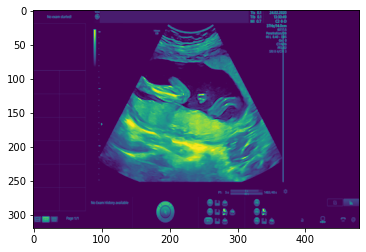

In [140]:
print('Test Image')

imageB_cpu = F.to_pil_image(imageB.cpu().squeeze().unsqueeze(0))
plt.imshow(imageB_cpu)

In [141]:
# print('Ground Image A')

# mapA = F.to_pil_image(pmapA.detach().cpu().squeeze().unsqueeze(0))

# imageA_cpu = F.to_pil_image(imageA.cpu().squeeze().unsqueeze(0))
# plt.imshow(imageA_cpu)
# plt.imshow(mapA, cmap="jet", alpha=0.4)
# plt.plot()

# print(decision)


In [142]:
# # Mask
# maskA_cpu = F.to_pil_image(maskA.cpu().squeeze().unsqueeze(0))

# # imageA_cpu = F.to_pil_image(imageA.cpu().squeeze())
# plt.imshow(imageA_cpu)
# plt.imshow(maskA_cpu, cmap="jet", alpha=0.4)
# plt.plot()

# print(decision)

Dice 0.35105403663812945


0.35105403663812945

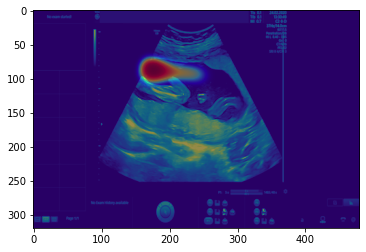

In [143]:


mapB = F.to_pil_image(pmapB.detach().cpu().squeeze().unsqueeze(0))

imageB_cpu = F.to_pil_image(imageB.cpu().squeeze().unsqueeze(0))
plt.imshow(imageB_cpu)
plt.imshow(mapB, cmap="jet", alpha=0.4)
plt.plot()

get_dice_score(pmapB,maskB)

tensor([1.], device='cuda:3', grad_fn=<SigmoidBackward>)


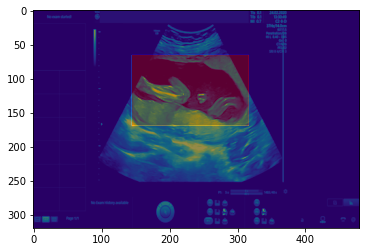

In [144]:
# Ground truth Mask
maskB_cpu = F.to_pil_image(maskB.cpu().squeeze().unsqueeze(0))

# imageA_cpu = F.to_pil_image(imageA.cpu().squeeze())
plt.imshow(imageB_cpu)
plt.imshow(maskB_cpu, cmap="jet", alpha=0.4)
plt.plot()

print(decision)


In [142]:
# # plt.imshow(F.to_pil_image(bw_img))
# bw_img.shape,maskB_np.shape
# plt.imshow(bw_img[0,:], cmap="gray")
# # bw_img[0,:].shape

In [143]:
# plt.imshow(maskB_np[0,:], cmap="gray")

In [144]:
# # plt.imshow(mapB)
# pmapB_np.max()
# pmapB_np.min()
# pmapB_np.mean()